In [36]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import pandas_datareader.data as web
from datetime import datetime


In [50]:
#Setting the end date to today
enddate = datetime.now()
#Start date set to 1 year back
startdate = datetime(end.year-1,end.month,end.day)

In [51]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
tech_list = ['AAPL','GOOGL','MSFT','AMZN']
#data = pdr.get_data_yahoo(y_symbols, start=startdate, end=enddate)
#Using Yahoo Finance to grab the stock data
for stock in tech_list:
    globals()[stock] = pdr.get_data_yahoo(stock, start=startdate, end=enddate) #The globals method sets the stock name to a global variable

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [46]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-01,148.210007,149.130005,146.610001,148.309998,147.485626,71250400
2022-12-02,145.960007,148.000000,145.649994,147.809998,146.988403,65447400
2022-12-05,147.770004,150.919998,145.770004,146.630005,145.814972,68826400
2022-12-06,147.070007,147.300003,141.919998,142.910004,142.115646,64727200
2022-12-07,142.190002,143.369995,140.000000,140.940002,140.156601,69721100


In [47]:
#Basic stats for Apple's Stock
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01
mean,145.345003,146.894002,142.841000,144.458002,143.655042,7.248379e+07
std,2.780830,2.654130,2.457368,2.509898,2.495946,9.491695e+06
min,142.190002,143.369995,140.000000,140.940002,140.156601,6.212830e+07
25%,142.445000,144.767502,141.070000,142.714996,141.921726,6.629215e+07
50%,145.655006,146.980003,141.540001,143.850006,143.050430,7.009190e+07
75%,147.595005,148.847504,145.297497,146.340004,145.526581,7.488535e+07
max,149.500000,150.919998,146.610001,148.309998,147.485626,9.388620e+07


In [48]:
#Some basic info about the dataframe
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2022-12-01 to 2022-12-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10 non-null     float64
 1   High       10 non-null     float64
 2   Low        10 non-null     float64
 3   Close      10 non-null     float64
 4   Adj Close  10 non-null     float64
 5   Volume     10 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 560.0 bytes


<Axes: xlabel='Date'>

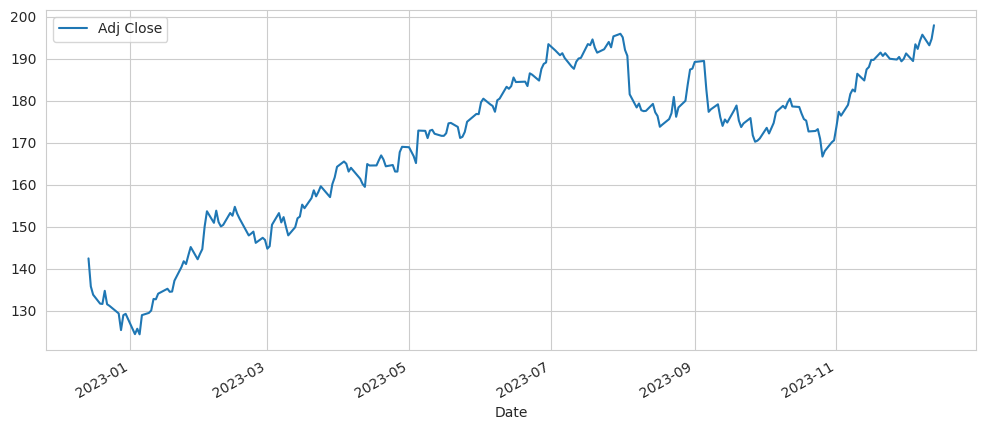

In [53]:
#Plotting the stock's adjusted closing price using pandas
AAPL['Adj Close'].plot(legend=True,figsize=(12,5))

<Axes: xlabel='Date'>

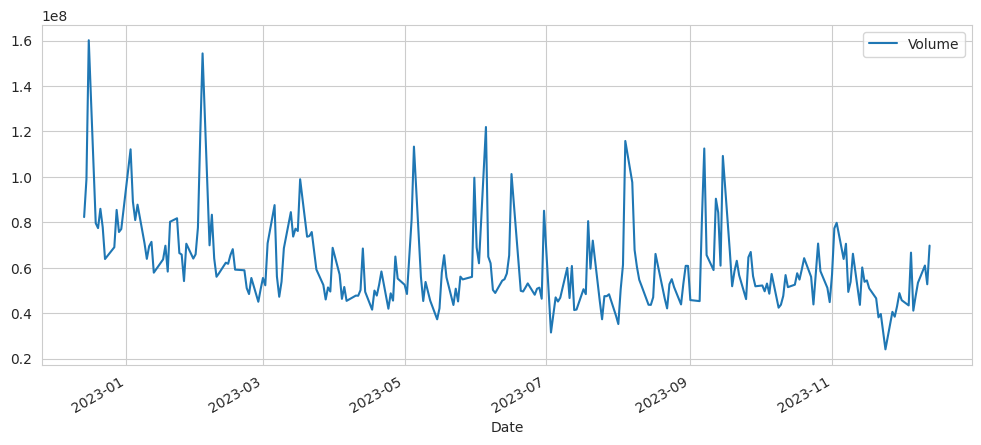

In [55]:
AAPL['Volume'].plot(legend=True,figsize=(12,5))

In [57]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma,center=False).mean()

AAPL.tail()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2023-12-07,193.630005,195.000000,193.589996,194.270004,194.270004,47477700,191.015999,189.588999,180.832074
2023-12-08,194.199997,195.990005,193.669998,195.710007,195.710007,53377300,191.589999,190.266000,181.336965
2023-12-11,193.110001,193.490005,191.419998,193.179993,193.179993,60943700,191.928999,190.605000,181.780870
2023-12-12,193.080002,194.720001,191.720001,194.710007,194.710007,52696900,192.360001,191.100500,182.204643
2023-12-13,195.089996,198.000000,194.850006,197.960007,197.960007,69726500,193.219002,191.626500,182.720379


<Axes: xlabel='Date'>

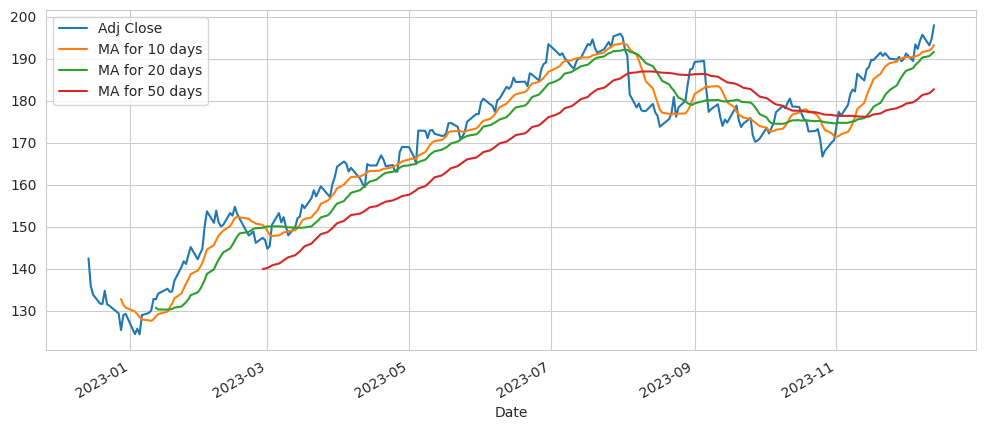

In [58]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,5))

In [60]:
#The daily return column can be created by using the percentage change over the adjusted closing price
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].tail()

Date
2023-12-07    0.010139
2023-12-08    0.007412
2023-12-11   -0.012927
2023-12-12    0.007920
2023-12-13    0.016691
Name: Daily Return, dtype: float64

<Axes: xlabel='Date'>

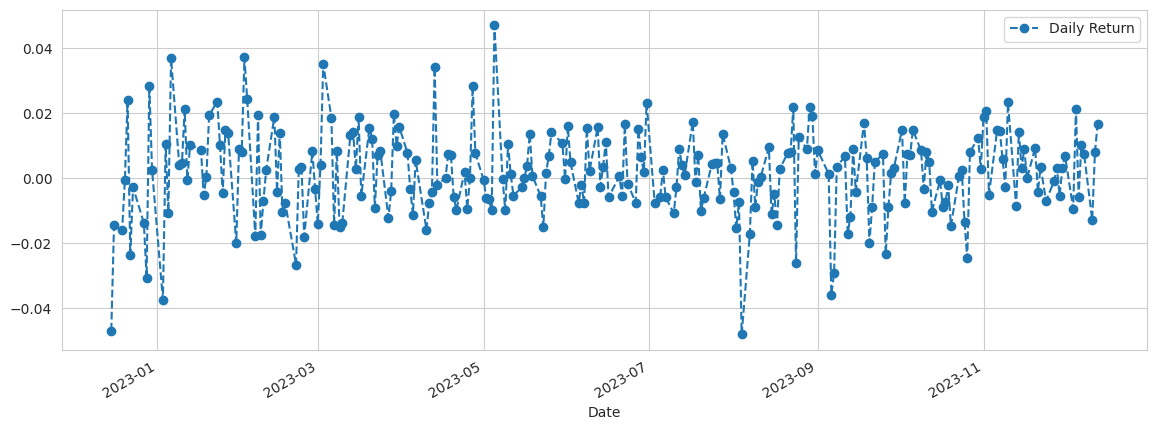

In [61]:
#Plotting the daily return
AAPL['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')

<Axes: xlabel='Daily Return', ylabel='Count'>

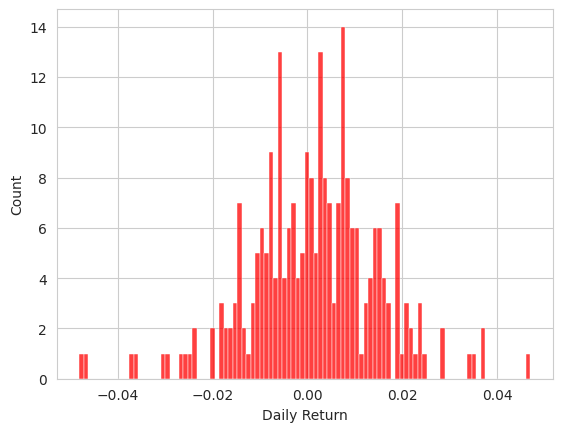

In [62]:
sns.histplot(x=AAPL['Daily Return'].dropna(),bins=100,color='red')

In [65]:
#Reading just the 'Adj Close' column this time
close_df = pdr.get_data_yahoo(tech_list, start=startdate, end=enddate)['Adj Close']

close_df.tail()

[*********************100%%**********************]  4 of 4 completed


,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2023-12-07,194.270004,146.880005,136.929993,370.950012
2023-12-08,195.710007,147.419998,134.990005,374.230011
2023-12-11,193.179993,145.889999,133.289993,371.299988
2023-12-12,194.710007,147.479996,132.520004,374.380005
2023-12-13,197.960007,148.839996,132.570007,374.369995


In [66]:
rets_df = close_df.pct_change()
rets_df.tail()

,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2023-12-07,0.010139,0.016330,0.053146,0.005830
2023-12-08,0.007412,0.003676,-0.014168,0.008842
2023-12-11,-0.012927,-0.010379,-0.012594,-0.007829
2023-12-12,0.007920,0.010899,-0.005777,0.008295
2023-12-13,0.016691,0.009222,0.000377,-0.000027


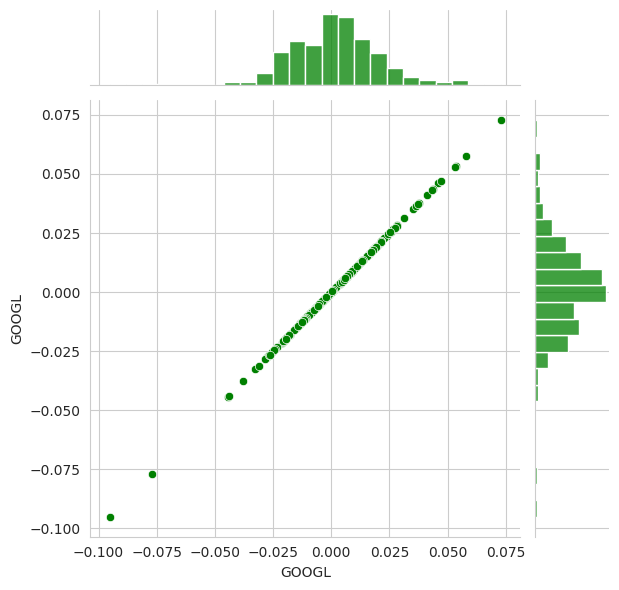

In [68]:
sns.jointplot(x = 'GOOGL',y = 'GOOGL', data = rets_df, kind='scatter',color='green')

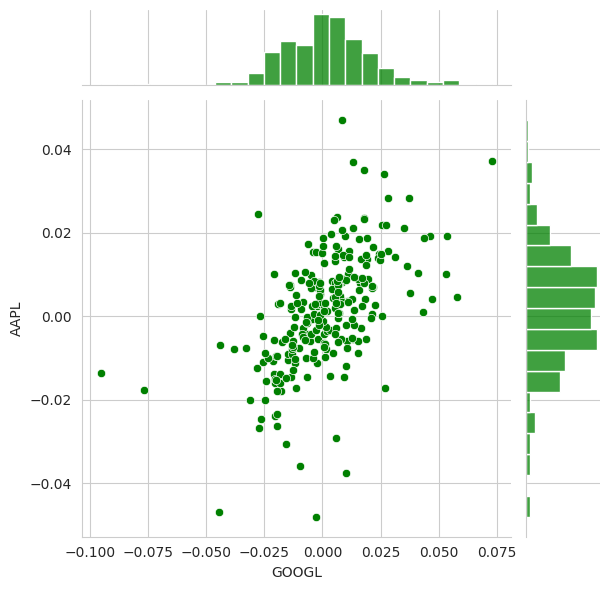

In [69]:
sns.jointplot(x = 'GOOGL',y = 'AAPL', data = rets_df, kind='scatter',color='green')

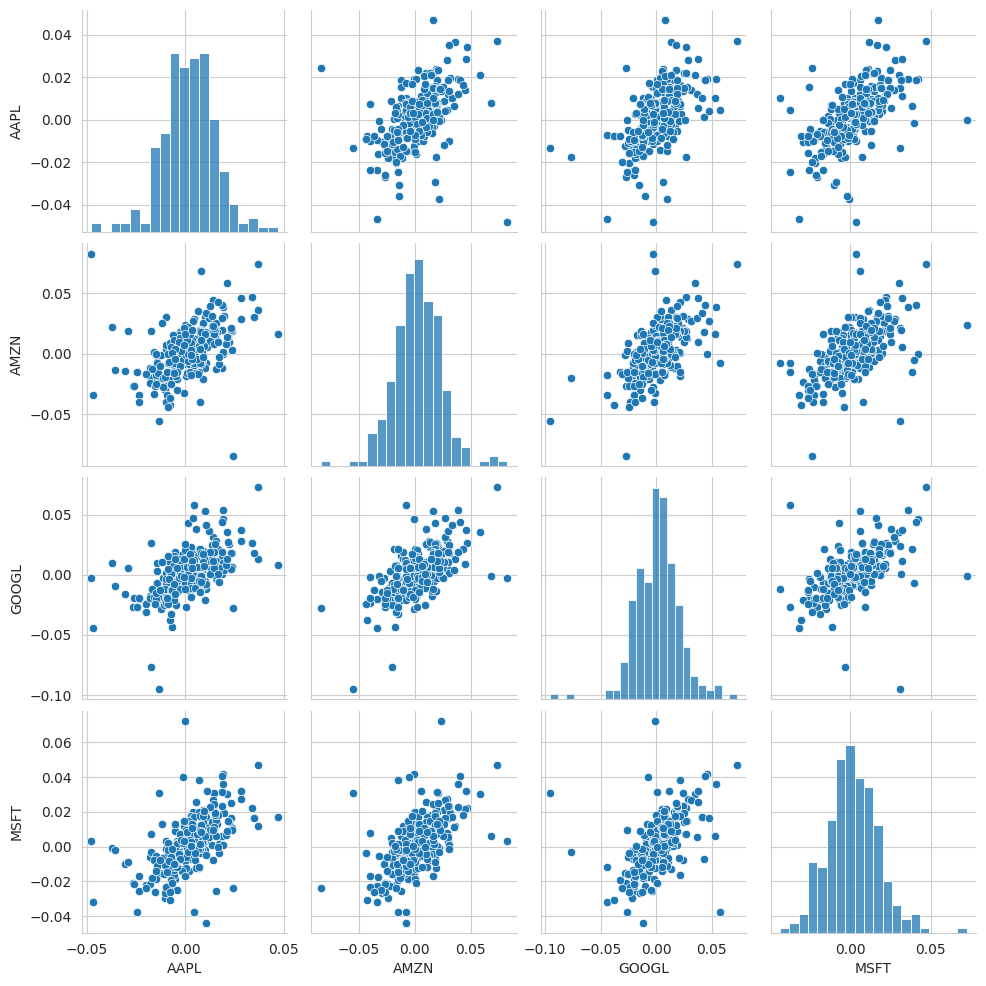

In [70]:
sns.pairplot(rets_df.dropna())

<Axes: ylabel='Date'>

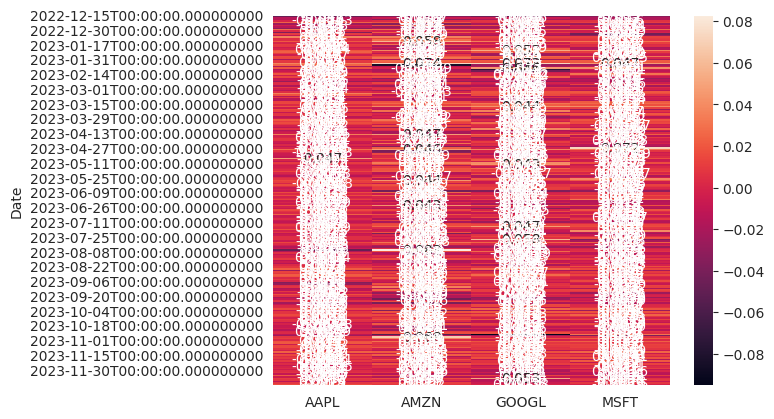

In [71]:
# the actual numbers for the correlation coefficients
sns.heatmap(rets_df.dropna(),annot=True)

**How much value do we put at risk**

In [72]:
rets = rets_df.dropna()

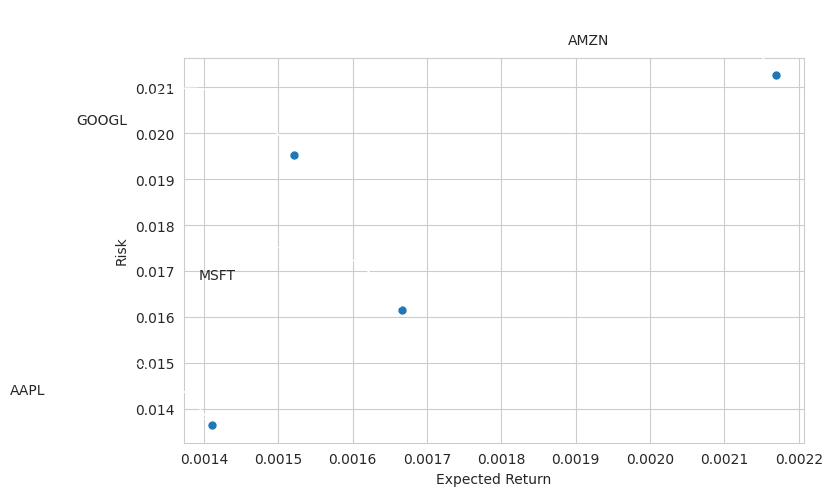

In [73]:
plt.figure(figsize=(8,5))

plt.scatter(rets.mean(),rets.std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')


#For adding annotatios in the scatterplot
for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-120,20),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.5'))


**Value at Risk**

We can treat Value at risk as the amount of money we could expect to lose for a given confidence interval. We'll use the 'Bootstrap' method and the 'Monte Carlo Method' to extract this value.

**Bootstrap Method**

Using this method, we calculate the empirical quantiles from a histogram of daily returns. The quantiles help us define our confidence interval.

<Axes: xlabel='Daily Return', ylabel='Count'>

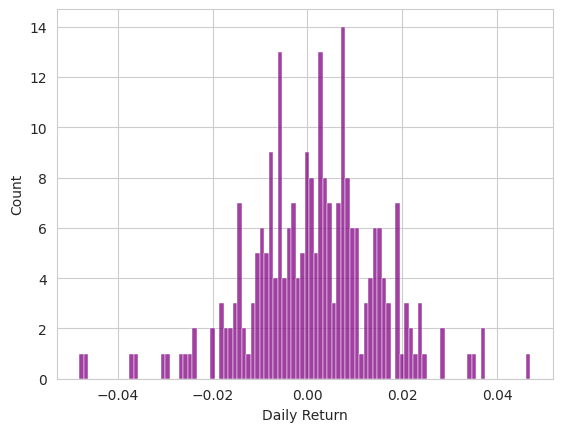

In [74]:
sns.histplot(x=AAPL['Daily Return'].dropna(),bins=100,color='purple')


In [75]:
rets.head()

,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2022-12-15,-0.046854,-0.034178,-0.044283,-0.031918
2022-12-16,-0.014579,-0.006670,-0.006604,-0.017349
2022-12-19,-0.015910,-0.033462,-0.020164,-0.017328
2022-12-20,-0.000529,0.003180,0.006558,0.005615
2022-12-21,0.023810,0.018547,0.006291,0.010877


In [76]:
#Using Pandas built in qualtile method
rets['AAPL'].quantile(0.05)

-0.01909807242575416

The 0.05 empirical quantile of daily returns is at -0.019. This means that with 95% confidence, the worst daily loss will not exceed 2.57% (of the investment).


**How can we attempt to predict future stock behaviour?**

**Monte Carlo Method**

---



In [80]:
days = 365

#delta t
dt = 1/365

mu = rets.mean()['GOOGL']

sigma = rets.std()['GOOGL']

In [81]:
#Function takes in stock price, number of days to run, mean and standard deviation values
def stock_monte_carlo(start_price,days,mu,sigma):

    price = np.zeros(days)
    price[0] = start_price

    shock = np.zeros(days)
    drift = np.zeros(days)

    for x in range(1,days):

        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))

        drift[x] = mu * dt

        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))

    return price

In [83]:
GOOGL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-14,95.199997,96.870003,93.599998,95.070000,95.070000,28733600
2022-12-15,93.129997,93.639999,90.010002,90.860001,90.860001,40107000
2022-12-16,90.760002,91.330002,89.519997,90.260002,90.260002,58011800
2022-12-19,90.260002,90.559998,88.209999,88.440002,88.440002,29493000
2022-12-20,88.110001,89.180000,87.440002,89.019997,89.019997,23453800


Let's do a simulation of 100 runs, and plot them.


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

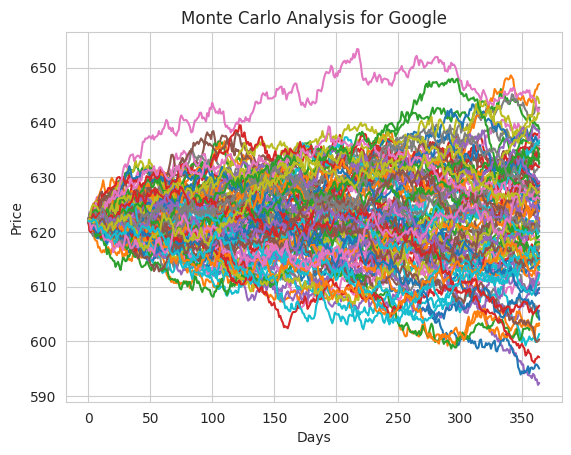

In [84]:
start_price = 622.049 #Taken from above

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [85]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

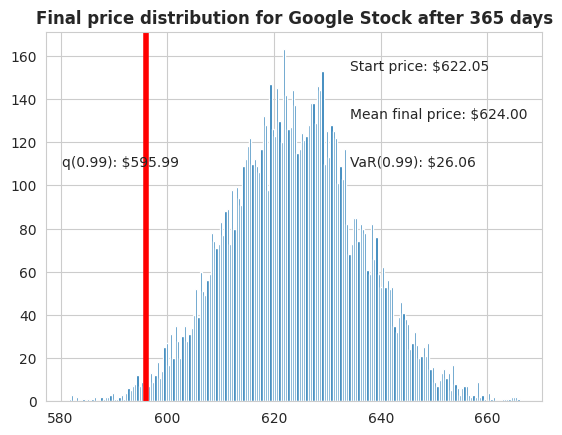

In [86]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" %days, weight='bold')

We can infer from this that, Google's stock is pretty stable. The starting price that we had was USD622.05, and the average final price over 10,000 runs was USD623.36.

The red line indicates the value of stock at risk at the desired confidence interval. For every stock, we'd be risking USD18.38, 99% of the time.